# Part II - Benefits and What Influences Prosper Rating
## by Favour Anazodo

## Investigation Overview
In this investigation my main focus is on the Prosper rating and I will be looking at the benefits of having a good prosper rating or the effect of having a poor prosper rating and also what could makes prosper ratings better.

## Dataset Overview
The dataset consists of information on loan request. Comprises 113,937 unique listings with 81 variables giving information about the borrower and the loan requested.
For this analysis all 81 variables were not used but 38 variables were selected and 29,955 rows were dropped due to null values in the Prosper Rating column, an extra column(AnnualIncome) was added by multiplying values in MonthlyIncome by 12.

In [1]:
#Import necessary packages and set plot to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read csv with pandas
prosper_loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# select needed columns
prosper_df = prosper_loan_df[['ListingKey','ListingCreationDate','ListingCategory (numeric)','BorrowerState','Occupation',
                                    'IsBorrowerHomeowner','EmploymentStatus','EmploymentStatusDuration','StatedMonthlyIncome',
                                    'IncomeRange','IncomeVerifiable','DebtToIncomeRatio','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper',
                                    'ProsperScore','ProsperRating (numeric)','ProsperRating (Alpha)','CurrentDelinquencies',
                                    'AmountDelinquent','CurrentCreditLines','OpenCreditLines','OpenRevolvingMonthlyPayment','RevolvingCreditBalance', 
                              'LoanOriginationDate','LoanOriginalAmount','Term','MonthlyLoanPayment','BorrowerRate',
                                'BorrowerAPR','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','LenderYield',
                                'Recommendations','Investors','LoanStatus','ClosedDate']].copy()

In [4]:
# drop rows with null values in the ProsperRating (Alpha) column
prosper_df = prosper_df.dropna(subset=['ProsperRating (Alpha)']).copy()

In [5]:
# Fill null values with 0
prosper_df.fillna(0,inplace=True)

In [6]:
# Drop duplicated ListingKey
prosper_df.drop_duplicates(['ListingKey'], keep='first', inplace=True)

In [7]:
# Map the lisitng category
category_map = {0:'Not available', 1:'Debt consolidation', 2:'Home improvement', 3:'Business', 4:'Personal loan', 
                5:'Student use', 6:'Auto', 7:'Other', 8:'Baby & Adoption Loans', 9:'Boat', 10:'Cosmetic Procedures',
                11:'Engagement Ring Financing', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
prosper_df['ListingCategory (numeric)'] = prosper_df['ListingCategory (numeric)'].map(category_map)

# Rename column
prosper_df=prosper_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'})

In [8]:
# Multiply monthly income by 12
prosper_df['AnnualIncome'] = prosper_df['StatedMonthlyIncome'] *12

In [9]:
# re-arrange columns
prosper_df=prosper_df[['ListingKey','ListingCreationDate','ListingCategory','BorrowerState','Occupation',
                                    'IsBorrowerHomeowner','EmploymentStatus','EmploymentStatusDuration','StatedMonthlyIncome','AnnualIncome',
                                    'IncomeRange','IncomeVerifiable','DebtToIncomeRatio','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper',
                                    'ProsperScore','ProsperRating (numeric)','ProsperRating (Alpha)','CurrentDelinquencies',
                                    'AmountDelinquent','CurrentCreditLines','OpenCreditLines','OpenRevolvingMonthlyPayment','RevolvingCreditBalance', 
                              'LoanOriginationDate','LoanOriginalAmount','Term','MonthlyLoanPayment','BorrowerRate',
                                'BorrowerAPR','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','LenderYield',
                                'Recommendations','Investors','LoanStatus','ClosedDate']]

# Benefits of Prosper Rating
## Loan Amount
### Distribution of Loan Amount
Loan amount in the dataset has a range of values, the highest values being at \\$4000, \\$15000 and $9000. The distribution of loan amount takes on a normal shape

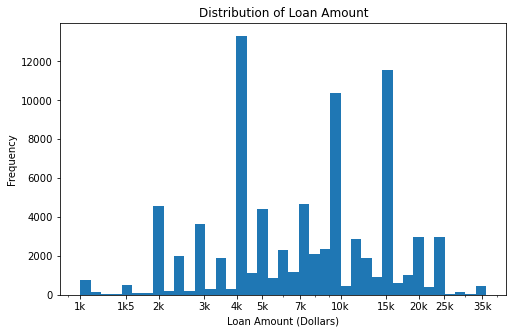

In [10]:
log_binsize = 0.04
bins = 10 ** np.arange(3, np.log10(prosper_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosper_df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3,1.5e3, 2e3, 3e3, 4e3, 5e3, 7e3, 1e4, 1.5e4, 2e4,2.5e4, 3.5e4], ['1k','1k5', '2k', '3k', '4k','5k','7k','10k', '15k','20k','25k','35k'])
plt.xlabel('Loan Amount (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

### Relationship with Prosper Rating
It clearly shows that loan amount decreases with rating as good rating (AA, A, B) has a higher loan amount than poor ratings (HR, E) which have low loan amount

In [11]:
category = ['AA', 'A','B','C','D','E','HR']
rating_cat = pd.api.types.CategoricalDtype(ordered=True, categories=category)
prosper_df['ProsperRating (Alpha)'] = prosper_df['ProsperRating (Alpha)'].astype(rating_cat)

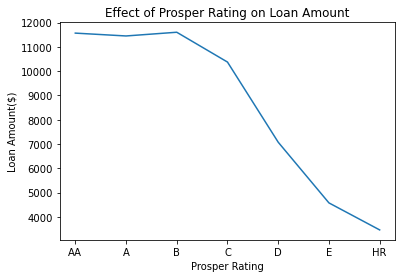

In [12]:
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Amount($)')
plt.title('Effect of Prosper Rating on Loan Amount');

## Interest Rate
### Distribution of Interest Rate
Interest rate has a range of values but the distribution shows there's a skew to the right, meaning interest rate is clustered around small values and fewer large interest rate though there is a spike around 0.3 and 0.32.

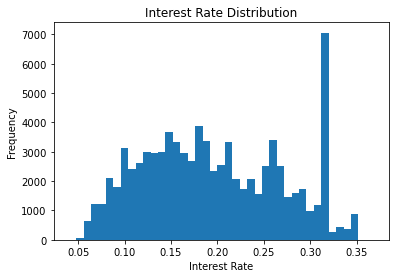

In [13]:
bins = np.arange(0.04, prosper_df['BorrowerRate'].max()+0.01, 0.008)
plt.hist(data=prosper_df, x='BorrowerRate', bins=bins)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Interest Rate Distribution')
plt.show()

### Relationship with Prosper Rating
We observe that the interest rate a borrower receives is based on the rating as good ratings (AA, A, B) gets lower interest rate than those with poor ratings (HR, E) which receive very high ratings. Which would also align with as to why better ratings could get higher loan amount because the interest rate they get is not a much as that of those with poor ratings.

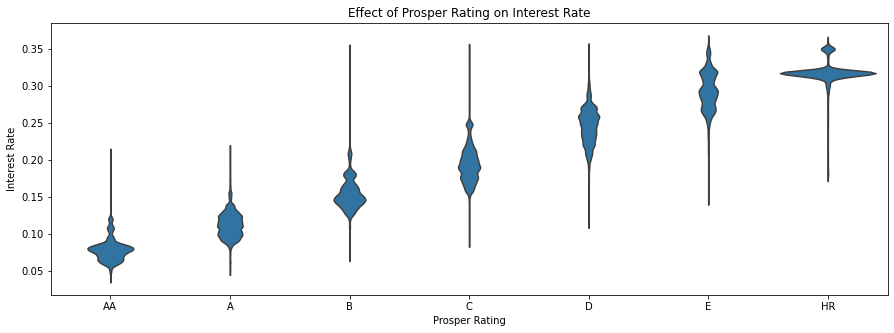

In [14]:
base_color = sns.color_palette()[0]
plt.figure(figsize=[15,5])
sns.violinplot(data=prosper_df, x='ProsperRating (Alpha)', y='BorrowerRate', inner=None, color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Interest Rate')
plt.title('Effect of Prosper Rating on Interest Rate');

### Investors
There is a higher number of investors ready to invest in loans whose borrower has a good rating though the interest rate is lower but the probability of getting his money back is higher than the probability of a High Risk(HR) borrower.

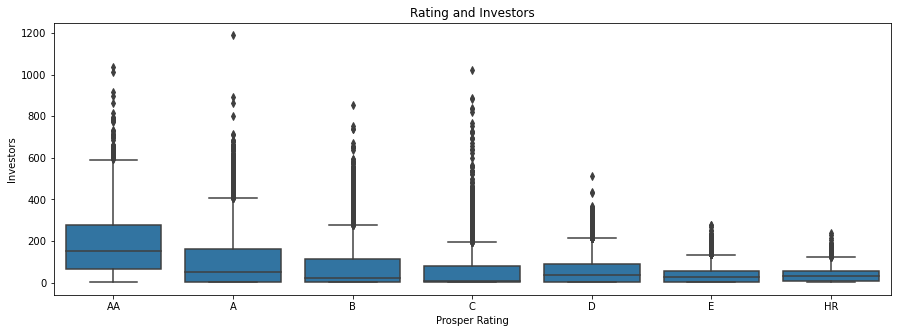

In [15]:
plt.figure(figsize=[15,5])
base_color=sns.color_palette()[0]
sns.boxplot(data=prosper_df, x='ProsperRating (Alpha)', y='Investors', color=base_color)
plt.title('Rating and Investors')
plt.xlabel('Prosper Rating')
plt.ylabel('Investors');

# What Influences Prosper Rating
### Annual Income, Amount Delinquent, Current Credit Lines and Revolving Credit Balance
We observe that good ratings have very high amount of annual income as compared to poor ratings.
For good rating we have high number of credit lines and high amount of revolving credit balance as compared to poor ratings but for amount delinquent poor ratings have a high amount.

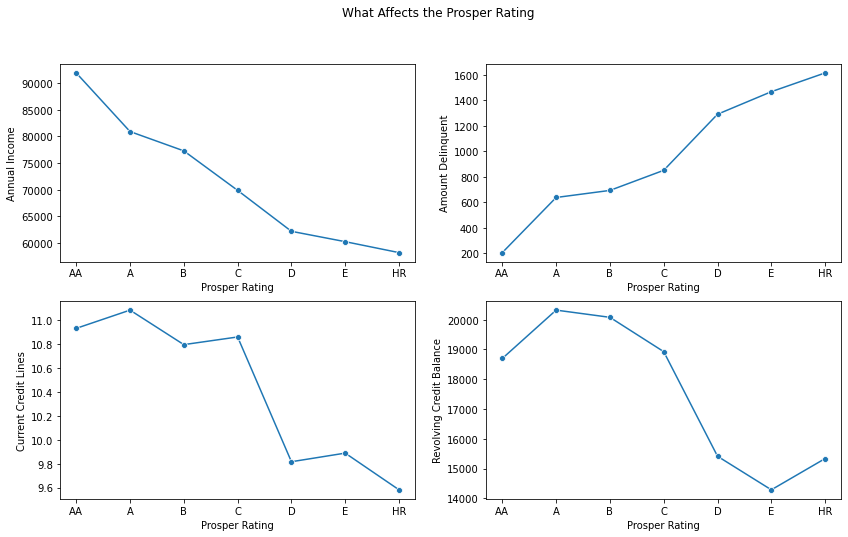

In [16]:
plt.figure(figsize=[14,8])

plt.subplot(2,2,1)
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='AnnualIncome', marker='o', ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Annual Income')

plt.subplot(2,2,2)
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='AmountDelinquent', marker="o", ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Amount Delinquent')

plt.subplot(2,2,3)
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='CurrentCreditLines', marker="o", ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Current Credit Lines')

plt.subplot(2,2,4)
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='RevolvingCreditBalance', marker="o", ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Revolving Credit Balance')

plt.suptitle('What Affects the Prosper Rating');

### Home Owner
It can be observed that good ratings from AA-C are often home owners unlike D, E and HR

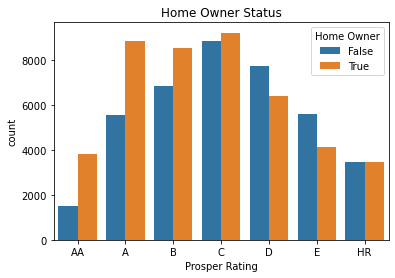

In [17]:
sns.countplot(data=prosper_df, x='ProsperRating (Alpha)', hue='IsBorrowerHomeowner')
plt.xlabel('Prosper Rating')
plt.legend(title='Home Owner')
plt.title('Home Owner Status');

### Debt to Income Ratio
Debt to Income Ratio for good rating is lower as compared to poor rating and this result supports the observation of income range for good rating being higher than the amount delinquent(debt) unlike the poor rating with high amount delinquent and low income.

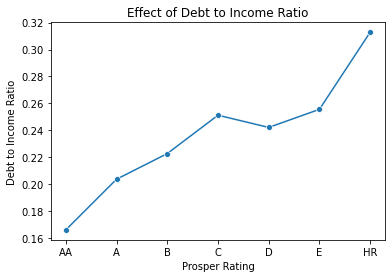

In [18]:
sns.lineplot(data=prosper_df, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', marker="o", ci=None)
plt.xlabel('Prosper Rating')
plt.ylabel('Debt to Income Ratio');
plt.title('Effect of Debt to Income Ratio');

In conclusion, it can be advised to work towards having a good prosper rating as it has quite a number of benefits when requesting for a loan and this can be achieved by having a good income with a low debt-to-income ratio and having a good amount of revolving credit and credit lines

In [1]:
!jupyter nbconvert Prosper_Loan_Data_Exploration_Part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loan_Data_Exploration_Part_2.ipynb to slides
[NbConvertApp] Writing 772834 bytes to Prosper_Loan_Data_Exploration_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Favour\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Favour\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Favour\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Favour\AppData\Roaming\Python\Python38\site-packages\nbconvert\nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "C:\Users\Favour\AppData\Roaming\Python\Python38\site-packages\nbconvert\nbconvertapp.py", line 588, in c